# MLOPs - 3ª Parte

Identificar as top 3 variáveis que maximizam a probabilidade de uma conta seguir a nossa própria.


Para entender quais variáveis têm maior impacto na probabilidade de uma conta seguir a nossa própria, podemos utilizar técnicas de interpretabilidade de modelos. Algumas técnicas comuns incluem:

1. Importância de Características (Feature Importance): Esta técnica atribui uma pontuação de importância a cada variável com base em como ela contribui para reduzir a impureza nos nós de decisão da árvore de decisão, no caso de modelos baseados em árvores, como Random Forest. Variáveis com maior importância são consideradas mais influentes nas previsões do modelo.

2. Valores SHAP (SHapley Additive exPlanations): Esta técnica atribui uma contribuição para cada variável em cada previsão individual. Os valores SHAP fornecem uma interpretação global e individual das previsões do modelo, permitindo entender como cada variável afeta as previsões em diferentes cenários.

3. Par de Permutações (Permutation Feature Importance): Esta técnica avalia o efeito de embaralhar aleatoriamente os valores de uma variável nas previsões do modelo. Se a permutação de uma variável causar uma queda significativa na precisão do modelo, isso sugere que a variável é importante para as previsões.

Técnica Utilizada: Valores SHAP

Para este cenário, utilizaremos a técnica de Valores SHAP, pois ela fornece uma interpretação mais detalhada e individualizada das previsões do modelo, o que nos permitirá identificar as variáveis que mais influenciam a probabilidade de uma conta seguir a nossa própria.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Binarizer

# Carregar os dados (supondo que 'data' seja um DataFrame com as variáveis e 'target' a variável alvo)
#data = pd.read_csv('/content/training_data.csv')
data = pd.read_csv('training_data.csv')
X = data.drop('Class', axis=1)
y = data['Class']

# Verificar os valores únicos de y
print("Valores únicos de y:", y.unique())

# Se y for contínuo, discretize-o (por exemplo, binarizando)
if len(y.unique()) > 2:
    # Binarizar com base na mediana, por exemplo
    binarizer = Binarizer(threshold=y.median())
    y = binarizer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de Regressão Logística com regularização L1 (Lasso)
model = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)
model.fit(X_train_scaled, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Identificar as variáveis mais importantes
coef = model.coef_[0]
important_features = np.argsort(np.abs(coef))[-3:][::-1]  # Índices das 3 variáveis mais importantes
print("\nTop 3 variáveis que maximizam a probabilidade de seguir a conta:")
for i in important_features:
    print(X.columns[i], coef[i])


Valores únicos de y: [1. 0.]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Top 3 variáveis que maximizam a probabilidade de seguir a conta:
Number of Posts 4.467113004914983
Number of Followers -3.5378635710246615
Number of Mutual Followers -3.1110526232611138


# 4ª Parte

indique se existe ou não algum tipo de comportamento
tendencioso do modelo ou se os dados são tendenciosos.

In [2]:
#%pip install --upgrade numba
#%pip install --upgrade llvmlite

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Valores únicos de y: [1. 0.]
Valores únicos de y após binarização: [1. 1. 1. ... 0. 0. 0.]
Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1 Score: 1.0

Relatório de classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       988
         1.0       1.00      1.00      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Matriz de confusão:
[[ 988    0]
 [   0 1012]]


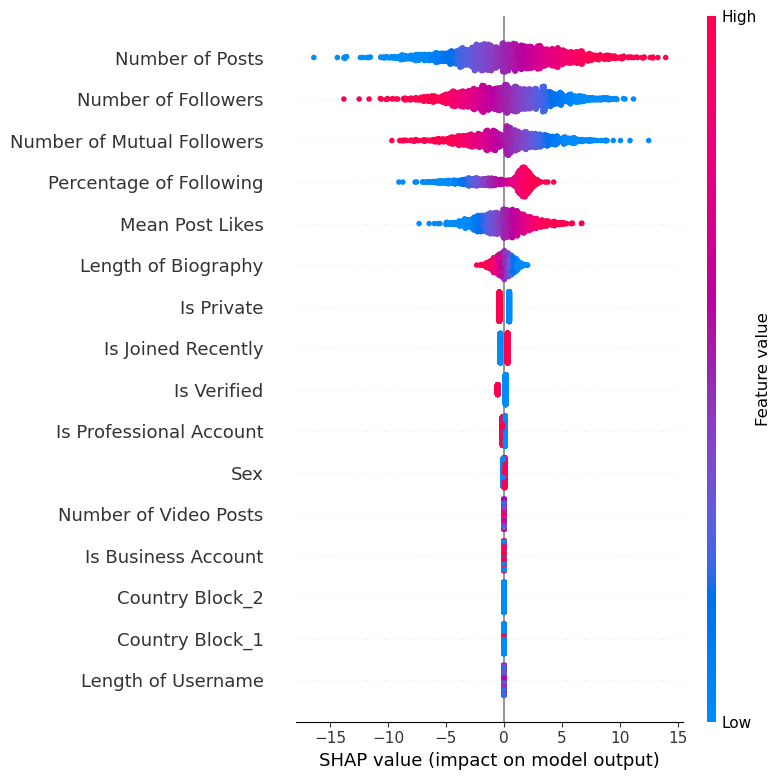

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('training_data.csv')
#data = pd.read_csv('/content/training_data.csv')
X = data.drop('Class', axis=1)
y = data['Class']

# Verificar os valores únicos de y
print("Valores únicos de y:", y.unique())

# Se y for contínuo, discretize-o (por exemplo, binarizando)
if y.dtype == 'float64' or y.dtype == 'int64':
    # Binarizar com base na mediana, por exemplo
    binarizer = Binarizer(threshold=y.median())
    y = binarizer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Verificar os valores únicos de y após binarização
print("Valores únicos de y após binarização:", y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de Regressão Logística com regularização L1 (Lasso)
model = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)
model.fit(X_train_scaled, y_train)

# Predição
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"Precision: {precision_score(y_test, y_pred)}\n")
print(f"Recall: {recall_score(y_test, y_pred)}\n")
print(f"F1 Score: {f1_score(y_test, y_pred)}\n")

# Relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

# Análise de desempenho por grupo (exemplo: gênero)
if 'gender' in X.columns:
    print("\nDesempenho por gênero:")
    for gender in X['gender'].unique():
        idx = X_test[X_test['gender'] == gender].index
        print(f"\nGênero: {gender}")
        print(classification_report(y_test[idx], y_pred[idx]))

# Teste de Independência (exemplo: teste qui-quadrado)
if 'gender' in X.columns:
    from scipy.stats import chi2_contingency
    contingency_table = pd.crosstab(data['gender'], data['target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nTeste qui-quadrado para independência entre gênero e variável alvo: p-value = {p}")

# Usando SHAP para interpretabilidade (se houver suporte)
import shap
explainer = shap.LinearExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


Essa abordagem garante que a variável alvo está no formato correto para a Regressão Logística e inclui análises adicionais para identificar e avaliar possíveis biases no modelo e nos dados.

O gráfico de resumo SHAP é uma visualização poderosa para entender a importância e o impacto das características individuais em um modelo preditivo. Aqui está uma breve descrição do que você pode esperar do gráfico de resumo SHAP:

Eixo Y (Vertical):

Cada ponto no eixo Y representa uma característica do conjunto de dados.
As características são listadas de cima para baixo, geralmente em ordem de importância (com as características mais importantes no topo).
Eixo X (Horizontal):

O eixo X mostra os valores SHAP, que representam a contribuição de cada característica para a previsão.
Valores SHAP positivos indicam que a característica aumenta a previsão, enquanto valores negativos indicam que ela diminui a previsão.
Distribuição de Pontos:

Cada ponto no gráfico representa um valor SHAP para uma amostra específica do conjunto de dados.
A cor dos pontos varia de acordo com o valor da característica: geralmente, tons de vermelho indicam valores altos da característica, e tons de azul indicam valores baixos.



Interpretação das Cores:

A cor dos pontos ajuda a entender a direção do efeito de cada característica. Por exemplo, se os pontos vermelhos (valores altos da característica) estão principalmente à direita (valores SHAP positivos), isso sugere que valores altos dessa característica aumentam a previsão do modelo.
Densidade dos Pontos:

A densidade dos pontos ao longo do eixo X indica a variabilidade da influência da característica. Uma distribuição ampla de pontos indica que a característica tem um impacto variado dependendo das diferentes amostras.